# Welcome!

In this notebook I will be creating several data visualizations to answer the questions associated with the Zebra population. The data will be stored in pandas dataframes, and the visualizations will be created with Matplotlib's Pyplot tool.

In [2]:
# Import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.3f}'.format # formatting option for pandas

In [3]:
# read the data from all of the dcsv files into pandas dataframes
sound_df = pd.read_csv('CSVs/sound_data.csv', header=0)
pox_df = pd.read_csv("CSVs/pox_data.csv", header=0)
gps_df = pd.read_csv("CSVs/gps_data.csv", header=0)
temp_df = pd.read_csv("CSVs/temp_data.csv", header=0)

### Question 1
___
**Is the Zebra population healthy? Make a thoughtful case one way or another**

In order to answer this question, we need to select data for the zebras that we tracked throughout the test. We tracked vital data using a PulseOximeter and can use that to track the health of Zebras. 

Though the data only contains the animal's ids when loaded, the type of animal can be figured out pretty easily with the DecodeKeys file provided for the animals as part of the sim. We can then select only data for Zebras. The vital data for the zebras will be plotted as time series data, with each Zebra having a plotline of different color so that we can distinguish them.

**Note:** In order to obtain the vital data, it was recommended by the TAs that we work with the first two values from the Pulse Oximeter inputs from the log file. It was noted by myself and several other classmates that the data from these two input values do not vary much. There is some variance in the pulse values from animal to animal occasionally, but the oxygen levels remain stagnant for each animal. It was also noted that the values for both the pulse and the oxygen levels were far from the expected levels, so the data will primarily be analyzed for stability, meaning low variance from animal to animal.

In [4]:
# working with the vitals/pox data
pox_df

# ~75,000 observations of 4 variables
#   - timestamp (float)
#   - animal-id (int)
#   - pulse (float)
#   - oxygen (float)

,timestamp,animal-id,pulse,oxygen
0,90.500,29,138.125,125.000
1,95.520,29,142.500,125.000
2,100.540,29,146.875,125.000
3,105.560,29,150.000,125.000
4,110.580,29,150.000,125.000
...,...,...,...,...
74887,11917.580,27,150.000,125.000
74888,11917.580,28,150.000,125.000
74889,11917.580,29,150.000,125.000
74890,11917.580,30,150.000,125.000


In [52]:
print(pox_df['animal-id'].unique())

[29 28 12 10  1  4 22 17 15  7 21 13 14 20 19  8  2  0 18  9  5 16 25 27
 23  3 26 31 30 24]


In [5]:
# from the decode keys, we know that the animals with ids greater than 17 are all zebras, so we create a subset of the dataframe with only the data with animal ids greater than 17
p1_df = pox_df[pox_df['animal-id'] > 17].reset_index().drop(columns=['index'])
p1_df

# ~31,000 observations of the same four datapoints

,timestamp,animal-id,pulse,oxygen
0,90.500,29,138.125,125.000
1,95.520,29,142.500,125.000
2,100.540,29,146.875,125.000
3,105.560,29,150.000,125.000
4,110.580,29,150.000,125.000
...,...,...,...,...
31533,11917.580,27,150.000,125.000
31534,11917.580,28,150.000,125.000
31535,11917.580,29,150.000,125.000
31536,11917.580,30,150.000,125.000


In [6]:
# how many zebras did we track?

print(len(p1_df['animal-id'].unique()))

# we tracked 14 Zebras of the 15 possible in the simulation
# who did we miss?

print(p1_df['animal-id'].unique())

# we missed Zebra-32

14
[29 28 22 21 20 19 18 25 27 23 26 31 30 24]


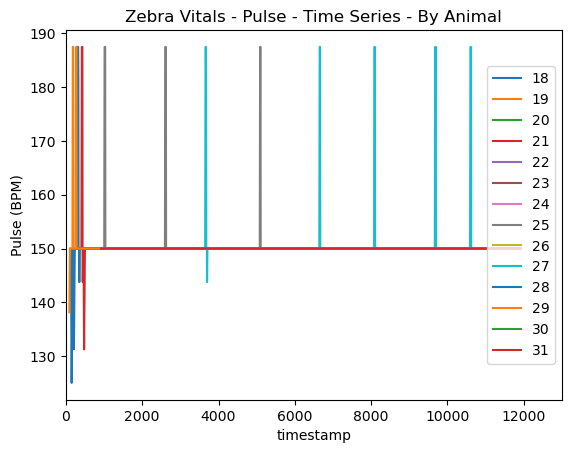

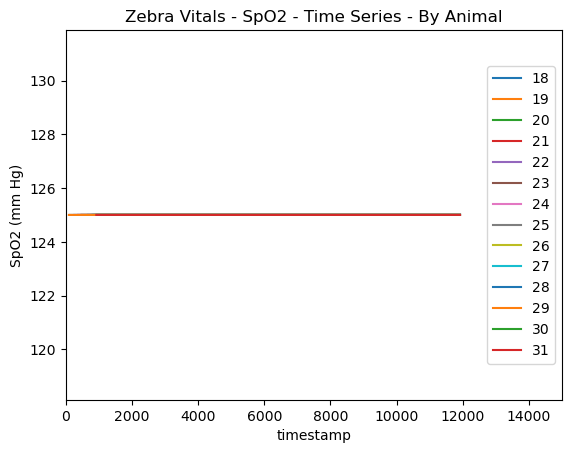

In [53]:
# let's answer our question
pd.pivot_table(p1_df.reset_index(), index='timestamp', columns='animal-id', values='pulse').plot(title="Zebra Vitals - Pulse - Time Series - By Animal", xlim=(0, 13000), ylabel="Pulse (BPM)").legend(loc='right')
pd.pivot_table(p1_df.reset_index(), index='timestamp', columns='animal-id', values='oxygen').plot(title="Zebra Vitals - SpO2 - Time Series - By Animal", xlim=(0, 15000), ylabel = "SpO2 (mm Hg)").legend(loc='right')

**Answer:** The above two plots, while they don't provide an incredibly large amount of information, do provide us with enough information to make the case that while the Zebra's population health is stable, it is not necessarily healthy. The resting pulse of a Zebra is between roughly 60 and 80 bpm, and we see that the pulse data is consistently almost double that, with the average pulse value beting around 150 bpm, and maximizing north of 180bpm in the case of several Zebras. We see a similar story with the SpO2 levels, as the average value should be between 95 and 100, but the values given in the test are all right around 125. 

Though these values are extreme, the relative lack of unxepected pulse changes is indicative of stability in the health of the population. At no point did the pulse of any of the Zebras drop below 130 bpm, indicating that none of the Zebras were killed by predators during the test. This information can also be used to answer other proceeding questions. The stability of the Zebra population's health is also sustained by the constant SpO2 levels seen in the plot of oxygen levels.

### Question 2
___
**Do the zebras have enough room to move around in?**

In order to answer this question, we need to select data for the zebras that we tracked throughout the test. We tracked location data using a GPS and can use that to track the movement of zebras. We can also use the location data from the Zebras to figure out how often they spend time at the fenced off edge of their area. If they spend a lot of time at the fenced area, it may be an indication that they are yearning for more area to roam around in.

Though the data only contains the animal's ids when loaded, the type of animal can be figured out pretty easily with the DecodeKeys file provided for the animals as part of the sim. We can then select only data for Zebras. The vital data for the zebras will be plotted as time series data, with each Zebra having a plotline of different color so that we can distinguish them.

In [8]:
# working with the GPS data
gps_df

# ~68,000 observations of 4 datapoints
#   - timestamp (float)
#   - animal-id (int)
#   - gpsX (float)
#   - gpsY (float)

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
67977,11917.580,27,360.779,304.663
67978,11917.580,28,59.102,816.156
67979,11917.580,29,78.422,825.035
67980,11917.580,30,210.541,14.592


In [9]:
# create subset containing only zebra data
p2_df = gps_df[gps_df['animal-id'] > 17].reset_index().drop(columns='index')
p2_df

# ~ 32,000 observations of the same four datapoints

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
31485,11917.580,27,360.779,304.663
31486,11917.580,28,59.102,816.156
31487,11917.580,29,78.422,825.035
31488,11917.580,30,210.541,14.592


In [10]:
# consider the minimum and maximum values for gpsX and gpsY
minX = min(p2_df['gpsX'])
maxX = max(p2_df['gpsX'])
minY = min(p2_df['gpsY'])
maxY = max(p2_df['gpsY'])

print((minX, minY), (maxX, maxY))

# from this, we can safely assume that the dimensions of the map are roughly 1000x1000 and are indexed from one of the corners of the map

(37.08979, 14.59118) (998.4499, 998.45)


Let's define the "edge" of the area to be within the outer 2% of the area. That is, if a zebra is hanging out within 20 units of the edge of the map, then the zebra may be interested in exploring what's happening outside of the fenced off area. We grab all observations in this dataset below:

In [11]:
edge_df = p2_df[(p2_df['gpsX'] < 20) | (p2_df['gpsY'] < 20) | (p2_df['gpsX'] > 980) | (p2_df['gpsY'] > 980)].reset_index().drop(columns=['index'])
edge_df

,timestamp,animal-id,gpsX,gpsY
0,266.200,22,660.391,998.450
1,271.220,22,660.391,998.450
2,276.240,22,660.391,998.450
3,281.260,22,660.391,998.450
4,286.280,22,660.391,998.450
...,...,...,...,...
11044,11917.580,22,660.390,998.450
11045,11917.580,23,645.648,14.591
11046,11917.580,25,636.037,19.778
11047,11917.580,26,593.692,14.592


In [12]:
# how many zebras are at the edge at some point, and for how many observations is each one of them near the edge?
on_edge = pd.DataFrame(edge_df.groupby('animal-id')['animal-id'].count().reset_index(name='edge_count'))
on_edge


,animal-id,edge_count
0,19,2014
1,20,2246
2,22,2322
3,23,1796
4,25,700
5,26,1897
6,30,74


In [13]:
# There were five zebras that spent a lot of time on the edge of their zone. How does it compare to the total amount of time that they were tracked?
total_obs = pd.DataFrame(p2_df.groupby('animal-id')['animal-id'].count().reset_index(name='total_count'))

combined = on_edge.set_index('animal-id').join(total_obs.set_index('animal-id'), how='left', on='animal-id', rsuffix='_').reset_index()
combined['ratio'] = combined['edge_count']/combined['total_count']
combined[['animal-id', 'ratio']]

,animal-id,ratio
0,19,0.885
1,20,0.986
2,22,1.000
3,23,0.815
4,25,0.316
5,26,0.865
6,30,0.034


There are greater than 11,000 observations in the dataset where Zebras are considered 'on the edge' of their area of exploration. Of those, five zebras (19, 20, 22, 23, 26) make up 93% of the time spent on the edge. There were 14 total zebras that were tracked throughout the experiement.

**Answer:** Generally speaking, most of the zebras seem content with the amount of room that they have to explore in their little section of the Savanna. However, there were five zebras:

* Zebra-19
* Zebra-20
* Zebra-22
* Zebra-23
* Zebra-26

who were near the edge of their zone more than 80% of the time, and may be yearning for more room to explore outside of their fenced zone.

### Question 3
___
**Do you see any signs of poachers?**

In order to answer this question, we can reference the vitals data from the first question, as well as the sound data that hasn't yet been explored. The sound data across all animals can be explored, because poachers are likely to be interested in hunting all of the species of animals on which sound devices were deployed.

**Note:** Sound data was only obtained through Arduino messages, which were only sent for roughly the first 400 time periods of the experiment. The sound data is sparse, but it is still insightful to answering this question because of its consistency.

In [14]:
# working with the sound data
sound_df

# ~16100 observations of three datapoints
#   - timestamp (float)
#   - animal-id (int)
#   - sound level (float)

,timestamp,animal-id,sound
0,95.200,29,0.000
1,95.300,29,0.000
2,95.400,29,0.000
3,95.500,29,0.000
4,95.600,29,0.000
...,...,...,...
16092,376.200,29,0.000
16093,376.300,29,0.000
16094,376.400,29,0.000
16095,376.500,29,0.000


In [15]:
# how many animals of each type did we track?
import numpy as np
# we add a column to show the type of animal has which id
conditions = [
    (sound_df['animal-id'] > 17),
    (sound_df['animal-id'] <= 17) & (sound_df['animal-id'] > 11),
    (sound_df['animal-id'] <= 11)
]

values = ['zebra', 'lion', 'elephant']

sound_df['animal-type'] = np.select(conditions, values)

print(sound_df.groupby('animal-type')['animal-id'].unique())

# we collected data for three lions, four elephants, and four zebras

animal-type
elephant       [10, 1, 4, 7]
lion            [12, 17, 15]
zebra       [29, 28, 22, 21]
Name: animal-id, dtype: object


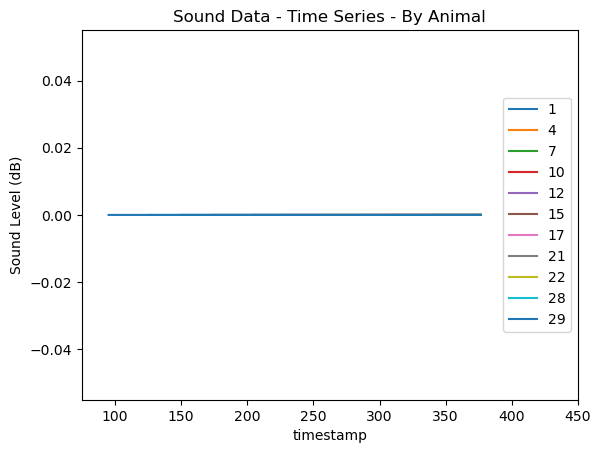

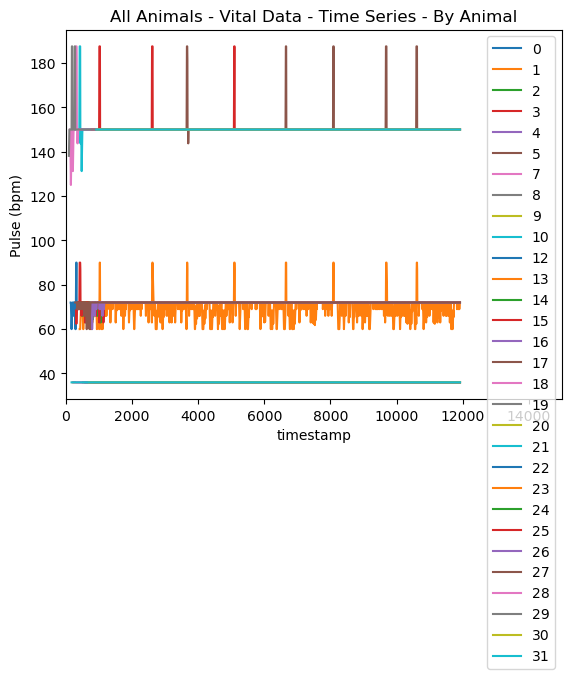

In [48]:
# create a similar plot to that from question 1, but for the sound data
pd.pivot_table(sound_df.reset_index(), index='timestamp', columns='animal-id', values='sound').plot(title="Sound Data - Time Series - By Animal", xlim=(75,450), ylabel="Sound Level (dB)").legend(loc='right')

# we also plot the vitals data for all animals to affirm that no animals were killed during the test
pd.pivot_table(pox_df.reset_index(), index='timestamp', columns='animal-id', values='pulse').plot(title="All Animals - Vital Data - Time Series - By Animal", xlim =(0, 15000), ylabel="Pulse (bpm)").legend(loc='upper right')

While there appears to be no sound data, this is not the case. What this actually means is that there were no sounds registered by any of the sensors. This certainly means that there were no gunshots, and the consistent vital data of all of the animals from the first problem further supports that zebras are not being hunted by poachers.

**Answer:** There is no evidence of poachers in the animals' protected area. This claim is supported by both vital data from all of the animals, as well as sound data from all of the animals as well. The vital data from all of the animals does not show any abnormalities that would be indicative of animals being hunted by poachers. Additionally, the sound data did not register any particularly load sounds such as gunshots, which likely would have registered had they occurred. For these reasons, it is safe to conclude that there are not poachers in the area.

### Question 4
___
**Plot a CDF of the movement speed of the zebras...what do you observe?**

In order to answer this question, we need to work with the GPS data. We can simply calculate the difference between GPS readings and plot the cumulative distrubition of those differences.

In [17]:
# working with the GPS data
gps_df

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
67977,11917.580,27,360.779,304.663
67978,11917.580,28,59.102,816.156
67979,11917.580,29,78.422,825.035
67980,11917.580,30,210.541,14.592


In [18]:
# get the GPS data for the zebras
q4_df = gps_df[gps_df['animal-id'] > 17].reset_index().drop(columns=['index'])
q4_df

# ~31,500 observations of four datapoints

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
31485,11917.580,27,360.779,304.663
31486,11917.580,28,59.102,816.156
31487,11917.580,29,78.422,825.035
31488,11917.580,30,210.541,14.592


In [19]:
# we can now group the observations by each animal-id to perform the calculations that way
pd.options.display.float_format = '{:.3f}'.format # to aid in the precision of the 
group = q4_df.groupby('animal-id').diff().dropna()
group['velocity'] = np.float32((group['gpsX']**2 + group['gpsY']**2)/(group['timestamp']))
group


,timestamp,gpsX,gpsY,velocity
1,5.020,-1.912,-9.674,19.372
2,5.020,-3.981,-10.451,24.913
3,5.020,3.779,-8.958,18.829
4,5.020,8.406,0.075,14.077
5,5.020,4.956,6.971,14.571
...,...,...,...,...
31485,5.020,0.000,0.000,0.000
31486,5.020,0.000,0.000,0.000
31487,5.020,0.000,0.000,0.000
31488,5.020,0.000,0.000,0.000


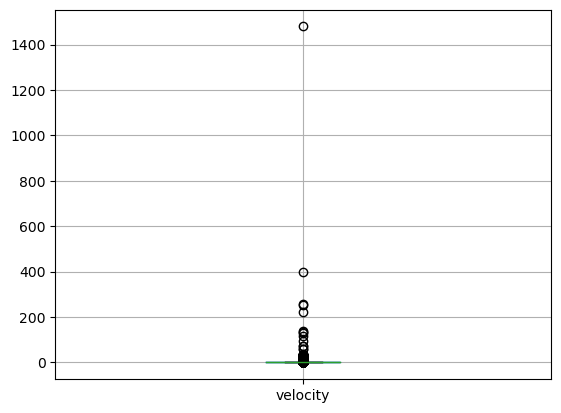

In [20]:
# now we can plot the CDF of the velocity function
# check for outliers first
group.boxplot(column='velocity')

# we have some very obvious outliers, most of which are greater than 100...let's drop those
group_adj = group[group['velocity'] <= 100]

(-4.81913948059082, 96.3827896118164)

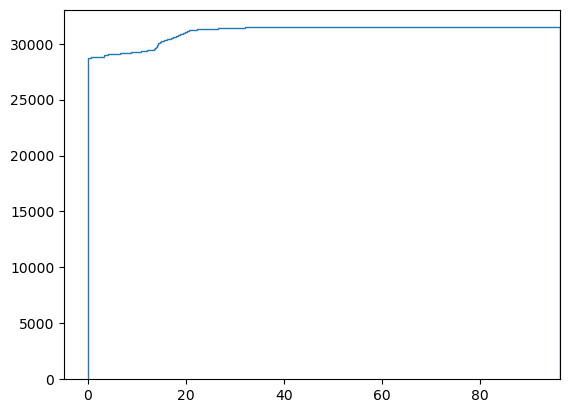

In [21]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(group_adj['velocity'], bins=500, cumulative=True, histtype='step')
ax.set_xlim((ax.get_xlim()[0], group_adj['velocity'].max()))


**Answer:** Above is the cumulative distribution function for the zebra's velocities after removing outliers from the dataset. What we notice is that the distribution is incredibly skewed, with the vast majority of speed obervations being right around 0. Nearly all of the observations are less than 40 units per time, with only a few observations between 40 units per time and 100 units per time. This is expected, as Zebras spend a lot of time in herds and don't typically move very rapidly. However, it was very interesting to see just how idle zebras really are as a species. 

### Question 5
___
**Do zebras make friends? Do you see pairs that tend to stay together?**

This question can be answered very similarly to the previous, except we wish to look for Zebras that are close to each other at specific timestamps. We can do this by calculating the differences between the Zebras' location data at a timestamp, and if they are within a certain threshold declare that they are congregating at that moment. We can also keep track of the number of instances when two Zebras are within a certain distance, and if they are within the distance threshold with enough frequency it can be safely assumed that they are in a "pack".

In [22]:
# working again with the location data
gps_df

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
67977,11917.580,27,360.779,304.663
67978,11917.580,28,59.102,816.156
67979,11917.580,29,78.422,825.035
67980,11917.580,30,210.541,14.592


In [23]:
# grab zebra data
q5_df = gps_df[gps_df['animal-id'] > 17].reset_index().drop(columns=['index'])
q5_df

# same ~31,000 observations as previous question

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
31485,11917.580,27,360.779,304.663
31486,11917.580,28,59.102,816.156
31487,11917.580,29,78.422,825.035
31488,11917.580,30,210.541,14.592


In [24]:
# for each timestamp, evaluate the distance between each pair of zebras, and if the manhattan distance is less than 30 units, increment the counter tracking
# the number of iteraction between two zebras

counts_dict = {
    18: {19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    19: {20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    20: {21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    21: {22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    22: {23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    23: {24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    24: {25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    25: {26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    26: {27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
    27: {28: 0, 29: 0, 30: 0, 31: 0},
    28: {29: 0, 30: 0, 31: 0},
    29: {30: 0, 31: 0},
    30: {31: 0}
}

for timestamp in q5_df['timestamp'].unique():

    # get sub dataframe of all observations at that time stamp
    sub_df = q5_df[q5_df['timestamp'] == timestamp]

    for i in range(len(sub_df)):

        # get animal info
        a_num = sub_df['animal-id'].iloc[i]
        a_x = sub_df['gpsX'].iloc[i]
        a_y = sub_df['gpsY'].iloc[i]

        # check other observations
        for j in range(i+1, len(sub_df)):

            # get second animal info
            b_num = sub_df['animal-id'].iloc[j]
            b_x = sub_df['gpsX'].iloc[j]
            b_y = sub_df['gpsY'].iloc[j]

            diff = abs(a_x - b_x) + abs(a_y - b_y)

            if diff < 50:

                try:

                    counts_dict[a_num][b_num] = counts_dict.get(a_num).get(b_num) + 1

                except Exception as e:

                    print(e)
                    counts_dict[b_num][a_num] = counts_dict.get(b_num).get(a_num) + 1


# iterate through the dictionary and create statements for zebras who congregated together
zebras = [i for i in range(18, 32)]
for i in zebras:
    for j in zebras:
        if j > i:
            val = counts_dict.get(i).get(j)
            if val == 0:
                continue
            elif val < 1000:
                print(f"Zebra {i} and zebra {j} spent some time together, being within 50 units of each other {val} times.")
            else:
                print(f"Zebra {i} and zebra {j} were together extremely frequently, being within 50 units of each other {val} times!")
            

Zebra 19 and zebra 20 spent some time together, being within 50 units of each other 8 times.
Zebra 21 and zebra 28 were together extremely frequently, being within 50 units of each other 2292 times!
Zebra 21 and zebra 29 were together extremely frequently, being within 50 units of each other 2292 times!
Zebra 23 and zebra 25 spent some time together, being within 50 units of each other 716 times.
Zebra 23 and zebra 26 spent some time together, being within 50 units of each other 52 times.
Zebra 25 and zebra 26 spent some time together, being within 50 units of each other 738 times.
Zebra 28 and zebra 29 were together extremely frequently, being within 50 units of each other 2339 times!
Zebra 30 and zebra 31 were together extremely frequently, being within 50 units of each other 2103 times!


**Answer**: There were several pairs of zebras that appear to have made friends with each other over the course of the data collection timeframe. Those who were around each other the most were:

* Zebras 19 and 20 - Though rare, they did cross into close proximity with each other a few times throughout the data collection timeline
* Zebras 21, 28, 29 - all of them were around the others at roughly 2,300 different instances throughout the data collection phase
* Zebras 23, 25, 26 - appeared close to each other frequently, with zebra 25 generally being in the middle of zebras 23 and 26
* Zebras 30 and 31 - appeared close to each other about 2,100 times

### Question 6
___
**What locations to zebras tend to congregate at? Why do they tend to go there?**

We know from the previous question that certain packs of zebras congregate together pretty frequently. The question now is, where is that happening? And what is the reason behind where the congregate? We can answer this question by creating subset dataframes for the zebras that congregate together, and analyzing their locations on the map.

In [25]:
# working with the location data again
gps_df

,timestamp,animal-id,gpsX,gpsY
0,110.580,29,119.265,812.441
1,115.600,29,117.353,802.767
2,120.620,29,113.372,792.317
3,125.640,29,117.151,783.359
4,130.660,29,125.557,783.434
...,...,...,...,...
67977,11917.580,27,360.779,304.663
67978,11917.580,28,59.102,816.156
67979,11917.580,29,78.422,825.035
67980,11917.580,30,210.541,14.592


In [26]:
# create subset dfs for each of the sets of zebras that congregate with each other
df_19_20 = gps_df[(gps_df['animal-id'] == 19) | (gps_df['animal-id'] == 20)]
df_21_28_29 = gps_df[(gps_df['animal-id'] == 21) | (gps_df['animal-id'] == 28) | (gps_df['animal-id'] == 29)]
df_23_25_26 = gps_df[(gps_df['animal-id'] == 23) | (gps_df['animal-id'] == 25) | (gps_df['animal-id'] == 26)]
df_30_31 = gps_df[(gps_df['animal-id'] == 30) | (gps_df['animal-id'] == 31)]

dfs = [df_19_20, df_21_28_29, df_23_25_26, df_30_31]


In [27]:
congregation_boxes = []
# for each df, we can calcualte where the animals tend to congregate
for df in dfs:

    # track max and min to create bounding box of congregation movements
    xmin = 1e3
    xmax = 0
    ymin = 1e3
    ymax = 0

    # check for collision at timestamps in the df
    for timestamp in df['timestamp'].unique():

        sub_df = df[df['timestamp'] == timestamp]

        for i in range(len(sub_df)):

            # get animal info
            a_num = sub_df['animal-id'].iloc[i]
            a_x = sub_df['gpsX'].iloc[i]
            a_y = sub_df['gpsY'].iloc[i]

            # check other observations
            for j in range(i+1, len(sub_df)):

                # get second animal info
                b_num = sub_df['animal-id'].iloc[j]
                b_x = sub_df['gpsX'].iloc[j]
                b_y = sub_df['gpsY'].iloc[j]

                diff = abs(a_x - b_x) + abs(a_y - b_y)

                if diff < 50:

                    xmin = min(xmin, a_x, b_x)
                    xmax = max(xmax, a_x, b_x)
                    ymin = min(ymin, a_y, b_y)
                    ymax = max(ymax, a_y, b_y)

    congregation_boxes.append((xmin, ymin, xmax, ymax))

print(congregation_boxes)                 

                        

[(884.3915, 580.6487, 925.921, 621.8133), (59.10231, 799.5557, 89.85838, 825.0352), (583.7156, 14.59119, 645.6477, 133.1295), (202.2533, 49.22305, 244.0658, 113.0704)]


In [28]:
# did congregations occur because of predators?
lion_gps = gps_df[(gps_df['animal-id'] <= 17) & (gps_df['animal-id'] > 11)]

for box in congregation_boxes:

    lion_location_q = lion_gps[(lion_gps['gpsX'] > box[0]) & (lion_gps['gpsX'] < box[2]) & (lion_gps['gpsY'] > box[1]) & (lion_gps['gpsY'] < box[3])]

    if not lion_location_q.empty:

        print(f"Congregation in box {box} may have been the result of predators in the area.")

    else:

        print(f"Congregation in box {box} was not a result of predators in the area.")


Congregation in box (884.3915, 580.6487, 925.921, 621.8133) was not a result of predators in the area.
Congregation in box (59.10231, 799.5557, 89.85838, 825.0352) may have been the result of predators in the area.
Congregation in box (583.7156, 14.59119, 645.6477, 133.1295) was not a result of predators in the area.
Congregation in box (202.2533, 49.22305, 244.0658, 113.0704) was not a result of predators in the area.


**Answer:** Each set of animals tended to congregate in places well-dispersed throughout the map. As a matter of fact, each set of zebras that congregated did so in their own corner. This follows the species behavior, where families form independent of each other and will join herds later. 

On the rare occasions that Zebras 19 and 20 came into close proximity with each other, they did so in the central-right part of the confined space.

Zebras 23, 25 and 26 congregated in the southern right part of the confined space.

Zebras 30 and 31 congregated in the southern right most corner of the confined space.

In each of the above scenarios, the zebras chose to congregate there for climate reasons. There were trees present in that area of the map, leading to slightly cooler temperatures during the day. The final scenario, however, was a bit different.

Zebras 21, 28, and 29 created their own congregation in the northern leftmost corner of the confined space. But, there were no trees located in this area of the map. These zebras chose to congregate because of a predator in the area, lion-12. There was no other reason to congregate there, yet they chose to stay in a pack for the longest of any of the zebra packs detected in the data analysis.

### Question 7
___
**Are there any locations that zebras tend to avoid?**

To answer this question, we can simply create a scatterplot of the zebra's GPS readings and observe any areas that are untouched. Time series analysis of this data is not necessarily important since we are just trying to get a picture of everywhere the zebras have gone to, and everywhere that they left untouched.

In [29]:
# get data for different sets of animals on the GPS data
# we add a column to show the type of animal has which id
conditions = [
    (gps_df['animal-id'] > 17),
    (gps_df['animal-id'] <= 17) & (gps_df['animal-id'] > 11),
    (gps_df['animal-id'] <= 11)
]

values = ['zebra', 'lion', 'elephant']

gps_df['animal-type'] = np.select(conditions, values)
gps_df

,timestamp,animal-id,gpsX,gpsY,animal-type
0,110.580,29,119.265,812.441,zebra
1,115.600,29,117.353,802.767,zebra
2,120.620,29,113.372,792.317,zebra
3,125.640,29,117.151,783.359,zebra
4,130.660,29,125.557,783.434,zebra
...,...,...,...,...,...
67977,11917.580,27,360.779,304.663,zebra
67978,11917.580,28,59.102,816.156,zebra
67979,11917.580,29,78.422,825.035,zebra
67980,11917.580,30,210.541,14.592,zebra


<AxesSubplot:xlabel='gpsX', ylabel='gpsY'>

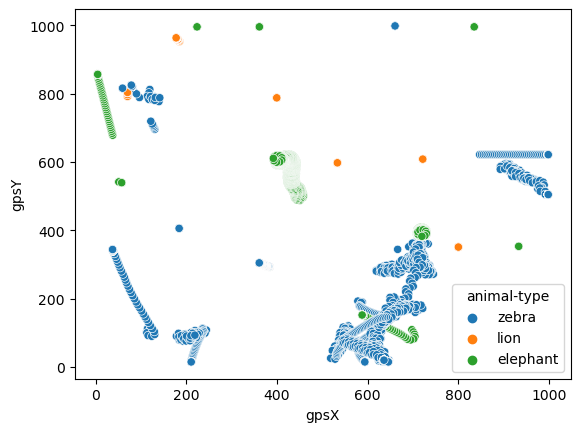

In [30]:
import seaborn as sns
# create a scatter plot from pandas
sns.scatterplot(data=gps_df, x="gpsX", y="gpsY", hue='animal-type')

**Answer**: Above is a plot of every GPS datapoint from the dataset. Generally speaking, zebras tended to stay near the edge of the map and avoided congregating near the middle. The middle of the map is dominated by elephants and lions, the latter of which are predatorial towards zebras. In an effort to avoid their predators, who were mostly concentrated in the center of the map, the zebras avoided that area and instead created congregations around the edges of the confined areas.